In [3]:
import pandas as pd
breast = pd.read_csv(r"C:\Users\Administrator\Desktop\数据集\breast.txt")
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
url = https://github.com/zhouwei713/DataAnalyse/blob/master/SVM/breast_data.csv

In [8]:
breast.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
print(breast["diagnosis"].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [12]:
breast.drop("id" ,axis = 1 ,inplace = True)

In [13]:
breast["diagnosis"] = breast["diagnosis"].map({"M":1,"B":0})

In [14]:
breast_mean = list(breast.columns[1:11])
breast_se = list(breast.columns[11:21])
breast_worst = list(breast.columns[21:31])

In [15]:
breast_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [17]:
breast.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


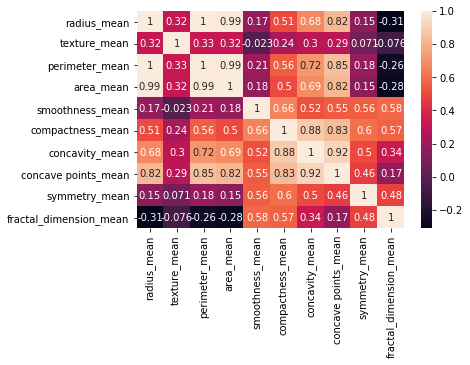

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
breast_corr = breast[breast_mean].corr()
sns.heatmap(breast_corr,annot = True)
plt.show()

In [41]:
breast_features = ["radius_mean","texture_mean","smoothness_mean","compactness_mean","symmetry_mean","fractal_dimension_mean"]

In [42]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(breast,test_size = 0.3)
x_train = train[breast_features]
y_train = train["diagnosis"]
x_test = test[breast_features]
y_test = test["diagnosis"]

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print("准确率：",accuracy_score(prediction,y_test))

准确率： 0.9122807017543859


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       121
           1       0.80      0.94      0.86        50

    accuracy                           0.91       171
   macro avg       0.88      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171



In [48]:
mush = pd.read_csv(r"C:\Users\Administrator\Desktop\mushrooms.txt")
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [49]:
####特征降维(主成分分析)
from sklearn.decomposition import PCA
mush_encoded = pd.get_dummies(mush)
mush_encoded.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
x_mush = mush_encoded.iloc[:,2:]
y_mush = mush_encoded.iloc[:,1]

In [51]:
y_mush.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p, dtype: uint8

In [52]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
pca = PCA(n_components = 10,whiten = True,random_state = 42)
svc = SVC(kernel = "linear",class_weight = "balanced")
model = make_pipeline(pca,svc)

In [53]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x_mush,y_mush,random_state = 42)

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {"svc__C":[1,5,10,50]}
grid = GridSearchCV(model,param_grid)
grid.fit(x_train,y_train)
grid.best_params_

{'svc__C': 5}

In [56]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'svc', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [61]:
svm_model = grid.best_estimator_

In [62]:
svm_model

Pipeline(steps=[('pca', PCA(n_components=10, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', kernel='linear'))])

In [63]:
grid

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=10, random_state=42,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [1, 5, 10, 50]})

In [64]:
yfit = svm_model.predict(x_test)
print(classification_report(y_test,yfit))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1040
           1       0.96      0.94      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



Text(91.68, 0.5, 'predicted label')

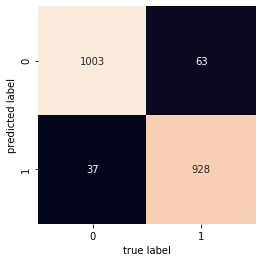

In [65]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,yfit)
sns.heatmap(mat.T ,square = True,annot=True,fmt="d",cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")

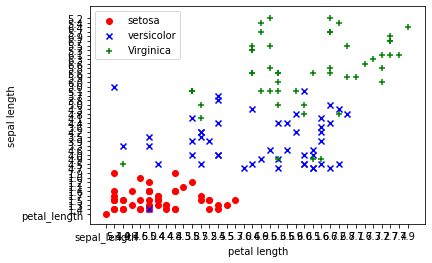

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
df = pd.read_csv(r'D:\面板数据文件\seaborn\seaborn-data-master\seaborn-data-master\iris.csv', header=None) # 加载Iris数据集作为DataFrame对象 
X = df.iloc[:, [0, 2]].values # 取出2个特征，并把它们用Numpy数组表示 
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa') # 前50个样本的散点图 
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor') # 中间50个样本的散点图 
plt.scatter(X[100:, 0], X[100:, 1],color='green', marker='+', label='Virginica') # 后50个样本的散点图 
plt.xlabel('petal length') 
plt.ylabel('sepal length') 
plt.legend(loc=2) # 说明放在左上角 
plt.show()

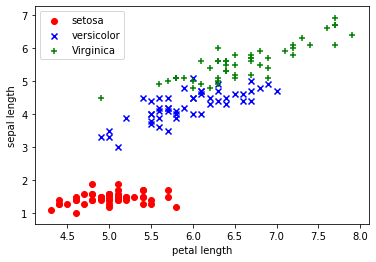

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) # 加载Iris数据集作为DataFrame对象 
X = df.iloc[:, [0, 2]].values # 取出2个特征，并把它们用Numpy数组表示 
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa') # 前50个样本的散点图 
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor') # 中间50个样本的散点图 
plt.scatter(X[100:, 0], X[100:, 1],color='green', marker='+', label='Virginica') # 后50个样本的散点图 
plt.xlabel('petal length') 
plt.ylabel('sepal length') 
plt.legend(loc=2) # 说明放在左上角 
plt.show()

In [31]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.columns = ["a","b","c","d","e"]
df

,a,b,c,d,e
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


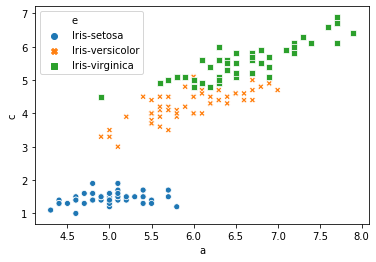

In [35]:
sns.scatterplot(x = df.iloc[:,0],y = df.iloc[:,2],hue = "e",style = "e" ,data = df )

AttributeError: 'numpy.ndarray' object has no attribute 'as_int'

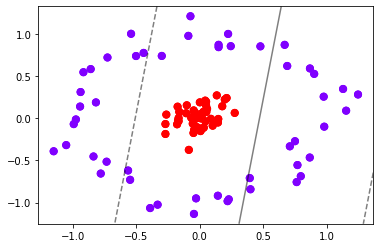

In [7]:
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()


In [5]:
a = 1.25
b = int(a)
b

1

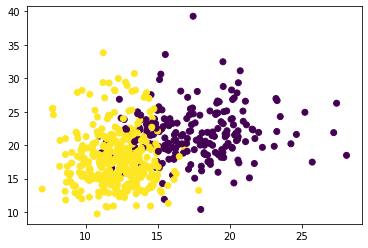

The accuracy under kernel linear is 0.929825
00:00:655998
The accuracy under kernel poly is 0.923977
00:00:113018
The accuracy under kernel rbf is 0.596491
00:00:052996
The accuracy under kernel sigmoid is 0.596491
00:00:006009


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
data = load_breast_cancer()
X = data.data
y = data.target
X.shape
np.unique(y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

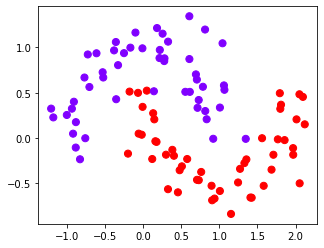

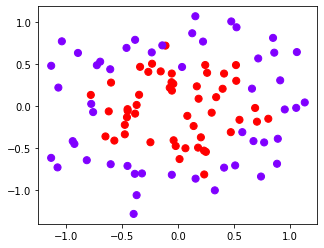

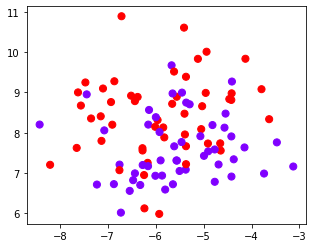

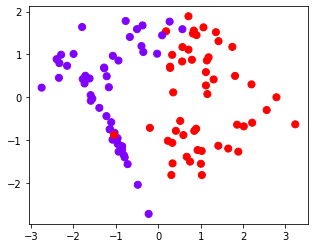

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features =
2,n_informative=2,n_redundant=0, random_state=5)
 ]
Kernel = ["linear","poly","rbf","sigmoid"]
#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

E:\environment\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
E:\environment\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
E:\environment\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='aut

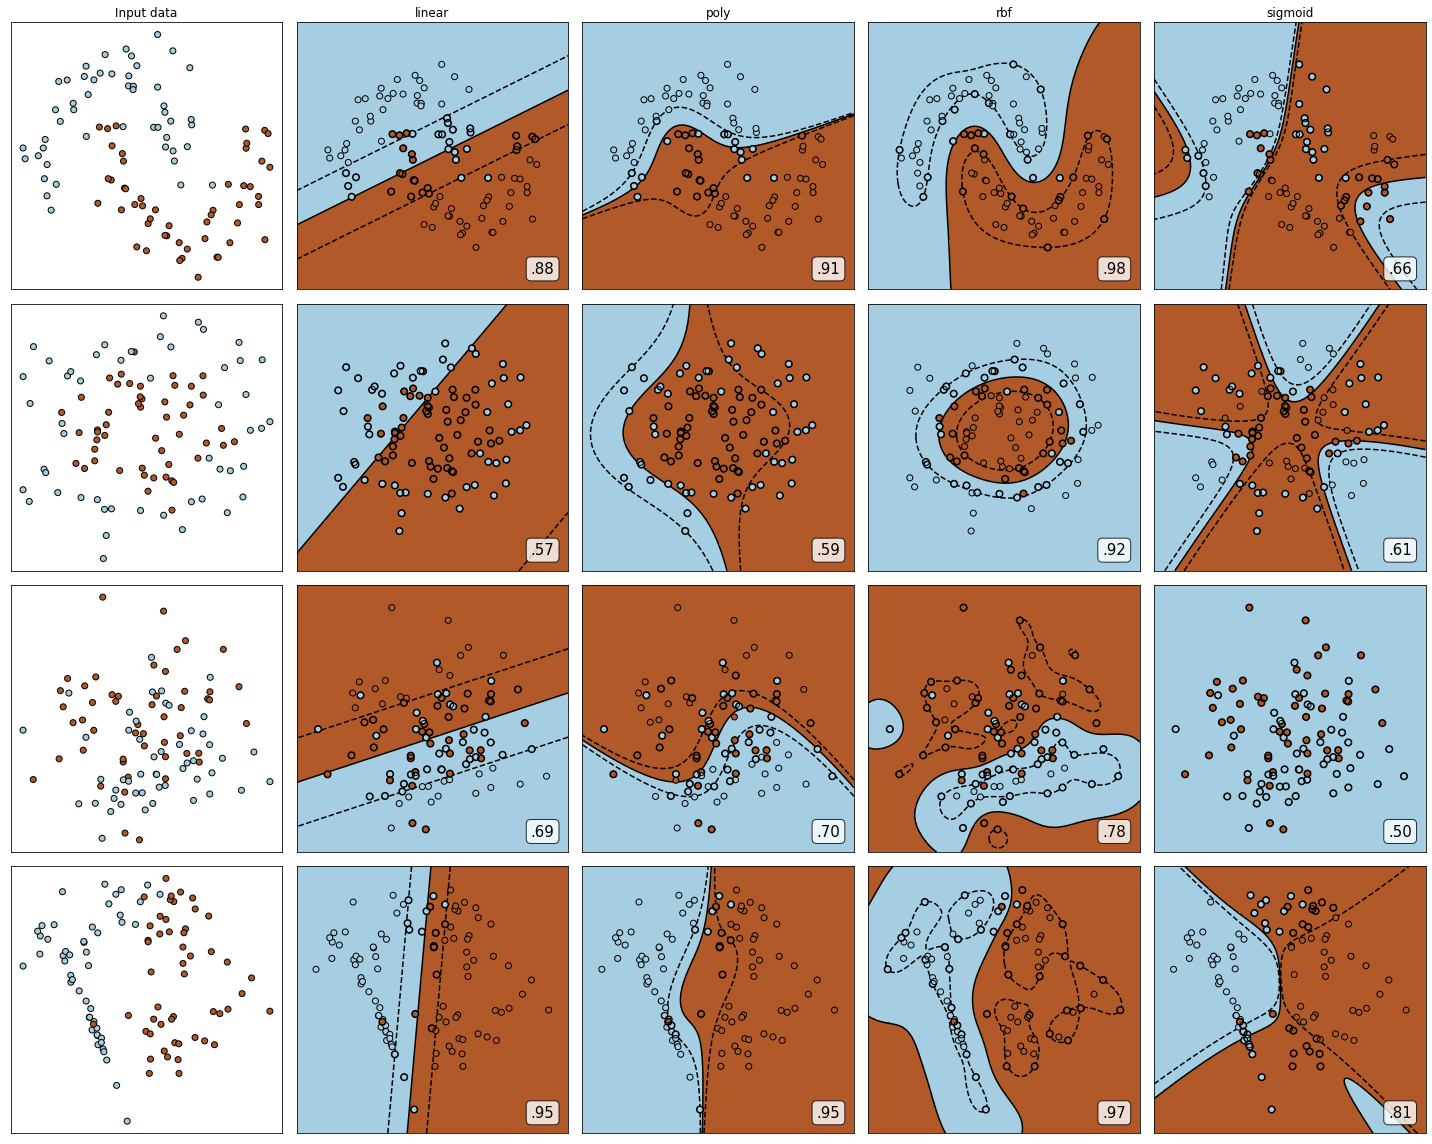

In [10]:
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))
#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数  
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
               , size=15
               , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
               #为分数添加一个白色的格子作为底色
               , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
               , horizontalalignment='right' #位于坐标轴的什么方向
               )
plt.tight_layout()
plt.show()


In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [14]:
import pandas as pd
x = pd.DataFrame(X)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
set(y)

{0, 1}

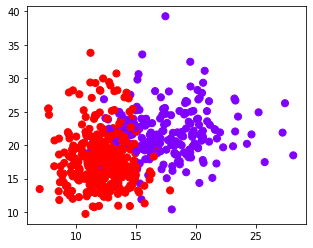

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
Kernel = ["linear","poly","rbf","sigmoid"]
#四个数据集分别是什么样子呢？
X = data.data
Y = data.target
fig,ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

In [8]:
#第二层循环：在不同的核函数中循环
#从图像的第二列开始，一个个填充分类结果
# for est_idx, kernel in enumerate(Kernel):
kernel = "linear"
#建模
clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
score = clf.score(X, Y)
score

0.9666080843585237

In [14]:
X[:,0]

In [16]:
set(Y)

{0, 1}

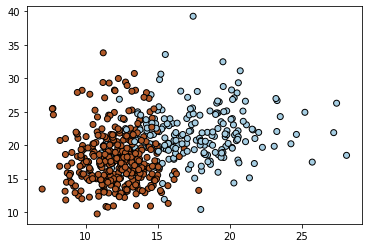

In [23]:
#绘制图像本身分布的散点图
plt.scatter(X[:,0], X[:,1] , c=Y
           ,zorder=10
           ,cmap=plt.cm.Paired,edgecolors='k')

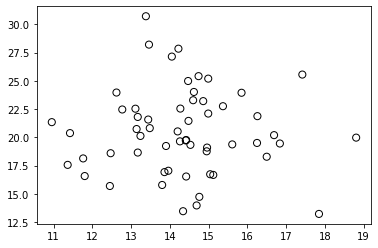

In [24]:
#绘制支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
            facecolors='none', zorder=2, edgecolors='k')


In [20]:
    #绘制决策边界
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
    #一次性使用最大值和最小值来生成网格
    #表示为[起始值：结束值：步长]
    #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内

In [29]:
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
XX.shape

(200, 200)

In [28]:
XX.ravel().shape

(40000,)

In [30]:
YY.ravel().shape

(40000,)

In [32]:
p = np.c_[XX.ravel(), YY.ravel()]
p.shape

(40000, 2)

In [33]:
clf

SVC(gamma=2, kernel='linear')

In [27]:
#np.c_，类似于np.vstack的功能
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z

ValueError: X.shape[1] = 2 should be equal to 30, the number of features at training time

In [26]:
Z.reshape(XX.shape)
Z

ValueError: X.shape[1] = 2 should be equal to 30, the number of features at training time

In [21]:
#填充等高线不同区域的颜色
ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#绘制等高线
ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

ValueError: X.shape[1] = 2 should be equal to 30, the number of features at training time

In [37]:
    #设定坐标轴为不显示
    ax.set_xticks(())
    ax.set_yticks(())


    #为每张图添加分类的分数  
    ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
           , size=15
           , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
           #为分数添加一个白色的格子作为底色
           , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
           , horizontalalignment='right' #位于坐标轴的什么方向
           )
plt.tight_layout()
plt.show()

ValueError: X.shape[1] = 2 should be equal to 30, the number of features at training time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
Kernel = ["linear","poly","rbf","sigmoid"]
#四个数据集分别是什么样子呢？
X = data.data
Y = data.target
fig,ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

In [ ]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
# Ytrain = Ytrain.iloc[:,0].ravel()
# Ytest = Ytest.iloc[:,0].ravel()
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 5000
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %
(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
   

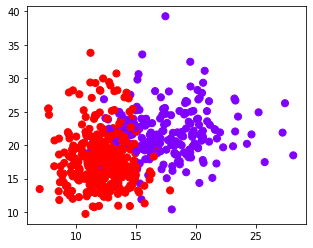

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#四个数据集分别是什么样子呢？
X = data.data
Y = data.target
fig,ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

In [35]:
model = SVC()
model.fit(X,Y)
prediction = model.predict(X)
print("准确率：",accuracy_score(prediction,Y))

准确率： 0.9226713532513181


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y,prediction))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       212
           1       0.90      0.98      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.90      0.91       569
weighted avg       0.93      0.92      0.92       569



Text(91.68, 0.5, 'predicted label')

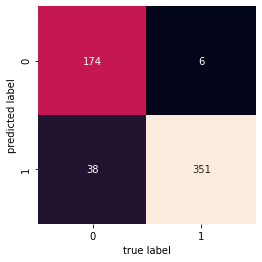

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y,prediction)
sns.heatmap(mat.T ,square = True,annot=True,fmt="d",cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [1]:
# 1.读取iris.csv 鸢尾花数
import pandas as pd
data = pd.read_csv(r"D:\微信文件\WeChat Files\Dulaoshixiuzhen\FileStorage\File\2020-11\iris.csv")
print(data)

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           5.0          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           5.9          3.0           5.1          1.8   

       Species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [4]:
# 2.存入dataframe
df = pd.DataFrame(data)
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
# 3. 描述性统计（versicolor,setosa,virginica分别做）
print(df.describe())

       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [6]:
#4. 柱状图 （versicolor,setosa,virginica数量的柱状图）
#方法一
import matplotlib.pyplot as plt
g = df["Species"].value_counts().reset_index()
g

,index,Species
0,setosa,50
1,versicolor,50
2,virginica,50


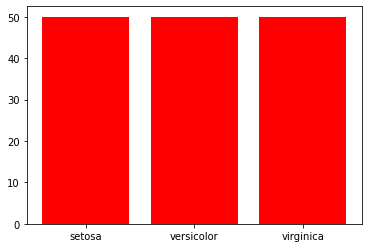

In [7]:
plt.bar(g["index"],g["Species"],color = "red")
plt.show()

        index  Species
0      setosa       50
1  versicolor       50
2   virginica       50


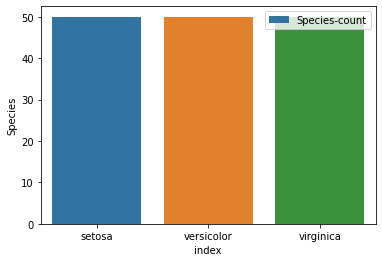

In [8]:
#方法二
import seaborn as sns
#分类汇总
g = df["Species"].value_counts().reset_index()
print(g)
sns.barplot(x=g.iloc[:,0],y=g.iloc[:,1] , label = "Species-count")
plt.legend()
plt.show()

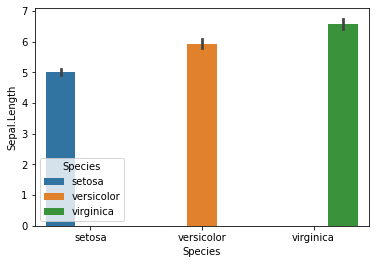

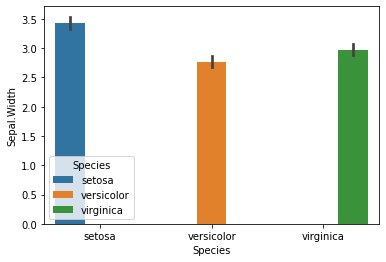

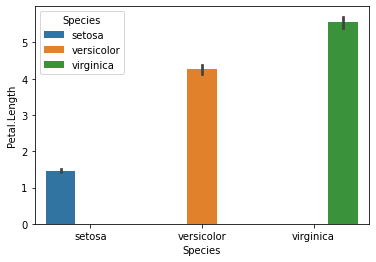

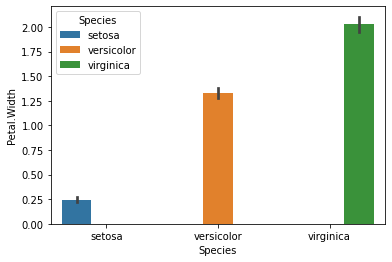

In [9]:
#画出每种鸢尾花的特征属性
for i in range(4):
    sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,i+1],hue = "Species",data =df)
    plt.show()

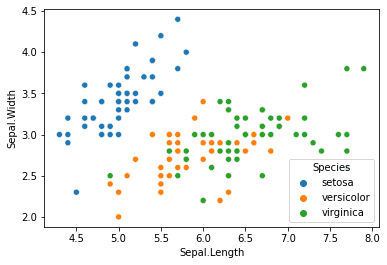

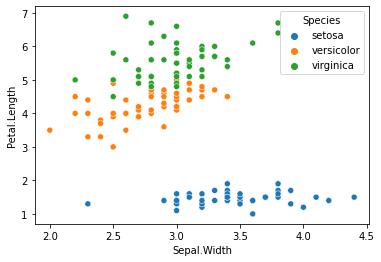

In [10]:
for i in range(2):
    sns.scatterplot(x=df.iloc[:,i+1],y=df.iloc[:,i+2],hue = "Species",data =df)
    plt.show()